In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing as ppd
# data path
dataPath = "../../Data/"

In [ ]:
# Importing data from csv file
data = pd.read_csv(os.path.join(dataPath,"datos_personas.csv"))

In [5]:
data.shape

(1000, 2)

In [6]:
data.head()

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1


## Viewing how the data behaves

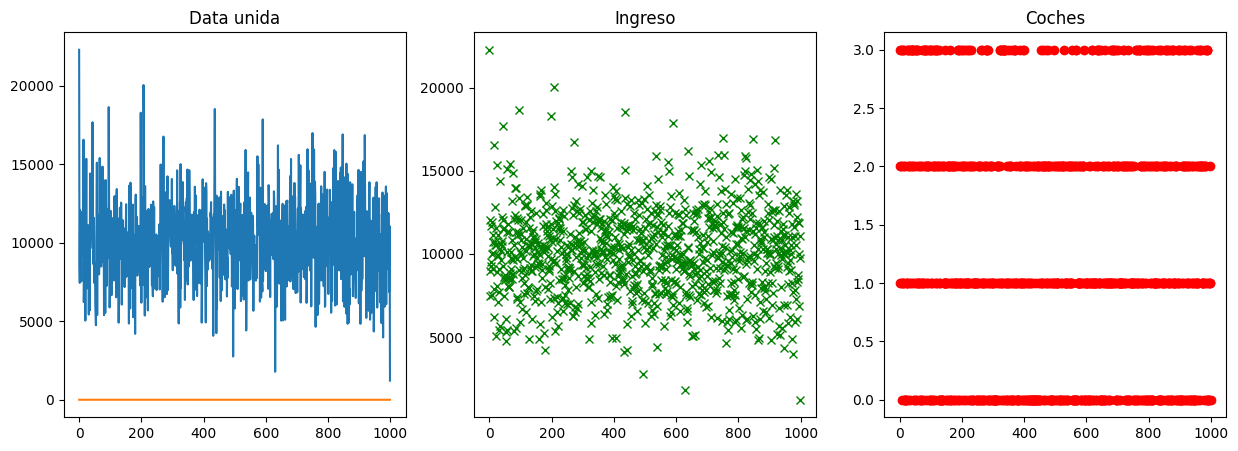

In [16]:
fig = plt.figure(figsize=(15,5)) # figsize(float, float) | Width, height in inches.
ax1 = fig.add_subplot(1,3,1) #*args : int, (int, int, index) | subplot(nrows, ncols, index, **kwargs)
ax2 = fig.add_subplot(1,3,2)  
ax3 = fig.add_subplot(1,3,3)  
ax1.set_title("Data unida")
ax1.plot(data)
ax2.set_title("Ingreso")
ax2.plot(data["ingreso"], linewidth=0, marker="x", color="green", markersize=6)
ax3.set_title("Coches")
ax3.plot(data["carros"], linewidth=0, marker="o", color="red", markersize=6)
plt.show()

## Viewing the data distribution

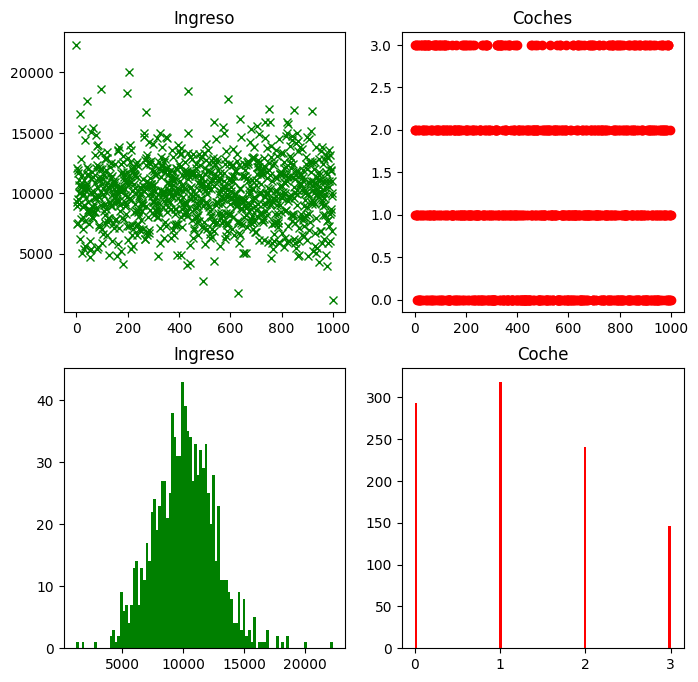

In [17]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)  
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)  
ax1.set_title("Ingreso")
ax1.plot(data["ingreso"], linewidth=0, marker="x", color="green", markersize=6)
ax2.set_title("Coches")
ax2.plot(data["carros"], linewidth=0, marker="o", color="red", markersize=6)
ax3.set_title("Ingreso")
ax3.hist(data["ingreso"], bins=100,color="green")
ax4.set_title("Coche")
ax4.hist(data["carros"], bins=100, color="red")
plt.show()

## Scaling data by using min and max scaler
We can use the tool from scikit-learn 

In [30]:
scaled_data = ppd.MinMaxScaler().fit_transform(data)
scaled_data

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

## Normalizing in function of the Vector Norm

In [38]:
# nomalised = X / sqrt(X_1^2 + X_2^2 + x_3^2 + ...) it works only with rows and we can use a transpose
normalised = ppd.Normalizer().transform(data.T)
normalised = normalised.T
normalised

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

## Standarization (SD=1, Mean=0)

### Standard Scaler

In [39]:
# standarized = (X - mean)/SD
standard = ppd.StandardScaler().fit_transform(data)
standard


array([[ 4.81555174,  1.70892042],
       [-0.4413019 , -0.23193185],
       [-1.04273197,  0.73849429],
       ...,
       [-0.12678303, -0.23193185],
       [ 0.38122719, -0.23193185],
       [-3.49719763, -1.20235798]])

### Robust Scaler

In [41]:
# robust = (X - IQR) / SD
robust = ppd.RobustScaler().fit_transform(data)
robust

array([[ 3.70548334,  1.        ],
       [-0.3376601 ,  0.        ],
       [-0.80023109,  0.5       ],
       ...,
       [-0.09575781,  0.        ],
       [ 0.29496225,  0.        ],
       [-2.68800607, -0.5       ]])

In [42]:
standard, robust

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

## Comparing methods for ingresos

As we can see,  scattered data graphs shows how despite rescaling, normalizing and standardizing the data, its points maintain the same dispersion as well as their distributions.

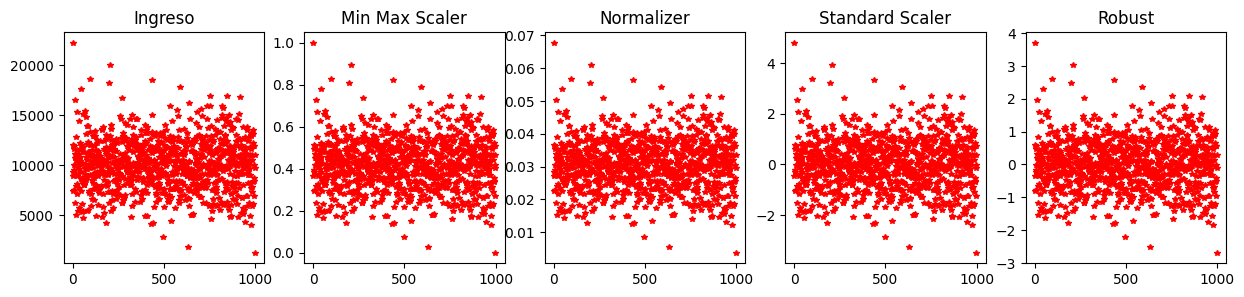

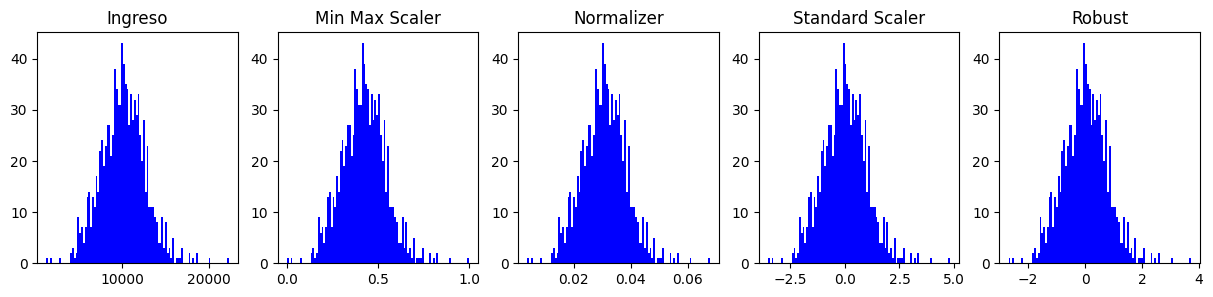

In [50]:
# cast numpy vectors to Dataframes to get graphs
df_mm = pd.DataFrame(scaled_data, columns=["ingreso", "carros"])
df_norm = pd.DataFrame(normalised, columns=["ingreso", "carros"])
df_sscal = pd.DataFrame(standard, columns=["ingreso", "carros"])
df_rob = pd.DataFrame(robust, columns=["ingreso", "carros"])

# Creating a figure with 5 subfigures for comparing methods
fig = plt.figure(figsize=(15, 3))
ay1 = fig.add_subplot(1,5,1)
ay2 = fig.add_subplot(1,5,2)
ay3 = fig.add_subplot(1,5,3)
ay4 = fig.add_subplot(1,5,4)
ay5 = fig.add_subplot(1,5,5)

# Customising data series
ay1.set_title("Ingreso")
ay1.plot(data["ingreso"], linewidth=0, marker='*', color="red", markersize=4)

ay2.set_title("Min Max Scaler")
ay2.plot(df_mm["ingreso"], linewidth=0, marker='*', color="red", markersize=4)

ay3.set_title("Normalizer")
ay3.plot(df_norm["ingreso"], linewidth=0, marker='*', color="red", markersize=4)

ay4.set_title("Standard Scaler")
ay4.plot(df_sscal["ingreso"], linewidth=0, marker='*', color="red", markersize=4)

ay5.set_title("Robust")
ay5.plot(df_rob["ingreso"], linewidth=0, marker='*', color="red", markersize=4)

plt.show()
# Creating a figure with 5 subfigures to show hists
fig = plt.figure(figsize=(15, 3))
ay1 = fig.add_subplot(1,5,1)
ay2 = fig.add_subplot(1,5,2)
ay3 = fig.add_subplot(1,5,3)
ay4 = fig.add_subplot(1,5,4)
ay5 = fig.add_subplot(1,5,5)

# Customising data series
ay1.set_title("Ingreso")
ay1.hist(data["ingreso"], color="blue", bins=100)

ay2.set_title("Min Max Scaler")
ay2.hist(df_mm["ingreso"], color="blue", bins=100)

ay3.set_title("Normalizer")
ay3.hist(df_norm["ingreso"], color="blue", bins=100)

ay4.set_title("Standard Scaler")
ay4.hist(df_sscal["ingreso"], color="blue", bins=100)

ay5.set_title("Robust")
ay5.hist(df_rob["ingreso"], color="blue", bins=100)

plt.show()

We visualize the behavioural of each tool:
* Min Max Scaler adjusts the data between 0 & 1, but does not standarize them. It is very used, however, could be highly affected by the presence of outliers.
* Normalizer does not have a good scaling because of the data tightness
* Standard scaler has a good scaling and standarization, however, it could present compications the presence of outliers.
* Robust standard seems to have a good performance by scaling and standarization the data, even handling outliers (Max point is less than 4). This algorithm is based on the use of the interqurtile range.

Now, we see the normalizer scaling got the data too tight. It means, the data is scaled to a very little distance each other.

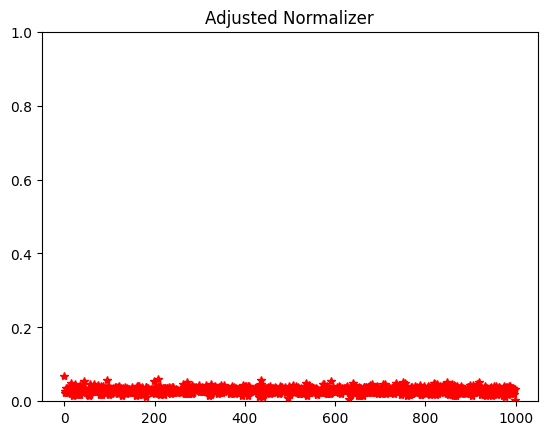

In [54]:
plt.figure()
plt.title("Adjusted Normalizer")
plt.plot(df_norm["ingreso"], color="red", marker="*", linewidth=0)
plt.ylim(0,1)
plt.show()

## Comparing methods for autos

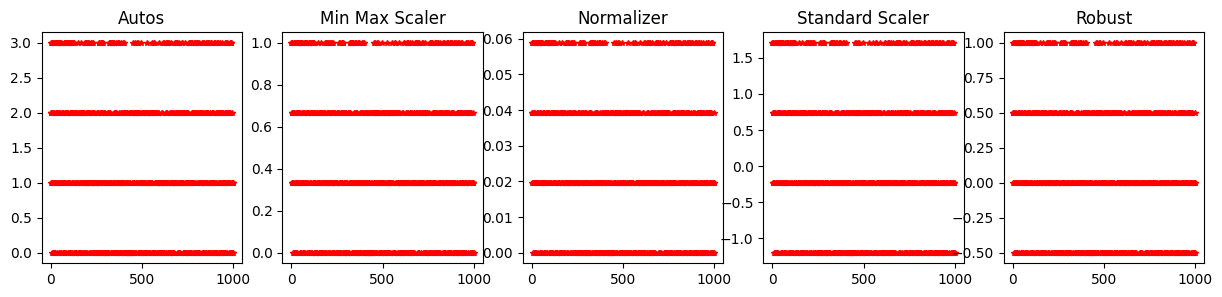

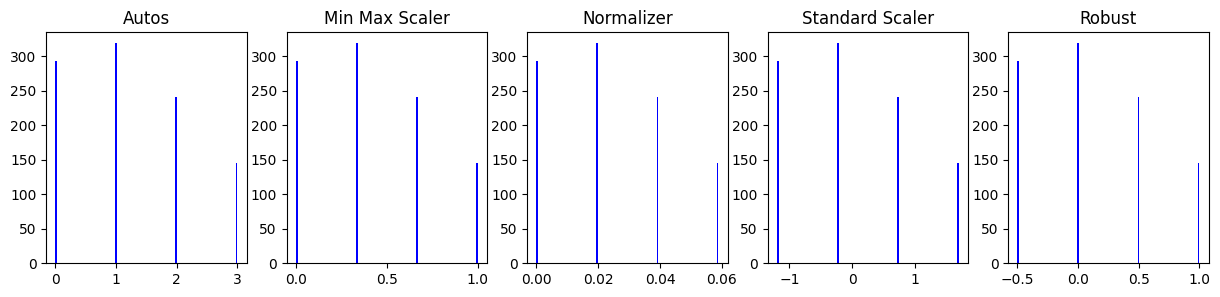

In [56]:
# Creating a figure with 5 subfigures for comparing methods
fig = plt.figure(figsize=(15, 3))
ay1 = fig.add_subplot(1,5,1)
ay2 = fig.add_subplot(1,5,2)
ay3 = fig.add_subplot(1,5,3)
ay4 = fig.add_subplot(1,5,4)
ay5 = fig.add_subplot(1,5,5)

# Customising data series
ay1.set_title("Autos")
ay1.plot(data["carros"], linewidth=0, marker='*', color="red", markersize=4)

ay2.set_title("Min Max Scaler")
ay2.plot(df_mm["carros"], linewidth=0, marker='*', color="red", markersize=4)

ay3.set_title("Normalizer")
ay3.plot(df_norm["carros"], linewidth=0, marker='*', color="red", markersize=4)

ay4.set_title("Standard Scaler")
ay4.plot(df_sscal["carros"], linewidth=0, marker='*', color="red", markersize=4)

ay5.set_title("Robust")
ay5.plot(df_rob["carros"], linewidth=0, marker='*', color="red", markersize=4)

plt.show()
# Creating a figure with 5 subfigures to show hists
fig = plt.figure(figsize=(15, 3))
ay1 = fig.add_subplot(1,5,1)
ay2 = fig.add_subplot(1,5,2)
ay3 = fig.add_subplot(1,5,3)
ay4 = fig.add_subplot(1,5,4)
ay5 = fig.add_subplot(1,5,5)

# Customising data series
ay1.set_title("Autos")
ay1.hist(data["carros"], color="blue", bins=100)

ay2.set_title("Min Max Scaler")
ay2.hist(df_mm["carros"], color="blue", bins=100)

ay3.set_title("Normalizer")
ay3.hist(df_norm["carros"], color="blue", bins=100)

ay4.set_title("Standard Scaler")
ay4.hist(df_sscal["carros"], color="blue", bins=100)

ay5.set_title("Robust")
ay5.hist(df_rob["carros"], color="blue", bins=100)

plt.show()
